2020-Apr-15, Wednesday

Notes from https://kingaa.github.io/clim-dis/parest/odes.html

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def SIR_RHS_closed(t, y, beta, gamma, N):
    S, I, R = y
    DS = -beta*S*I/N
    DI = beta*S*I/N - gamma*I
    DR = gamma*I
    
    dydt = [DS, DI, DR]
    return (dydt)

In [3]:
# Time for integration:
t_start = 0
t_stop = 50
dt = 1
t_List = np.arange(t_start, t_stop, dt)

In [4]:
# Parameters:
N = 763

In [5]:
beta_List = [1., 2., 3., 5.]
IP_List = np.array([20., 15., 12., 8., 4., 2.]) #infectious period.
gamma_List = 1./IP_List

In [6]:
# IC:
y0 = [N-1, 1, 0]
print("IC =", y0)

IC = [762, 1, 0]


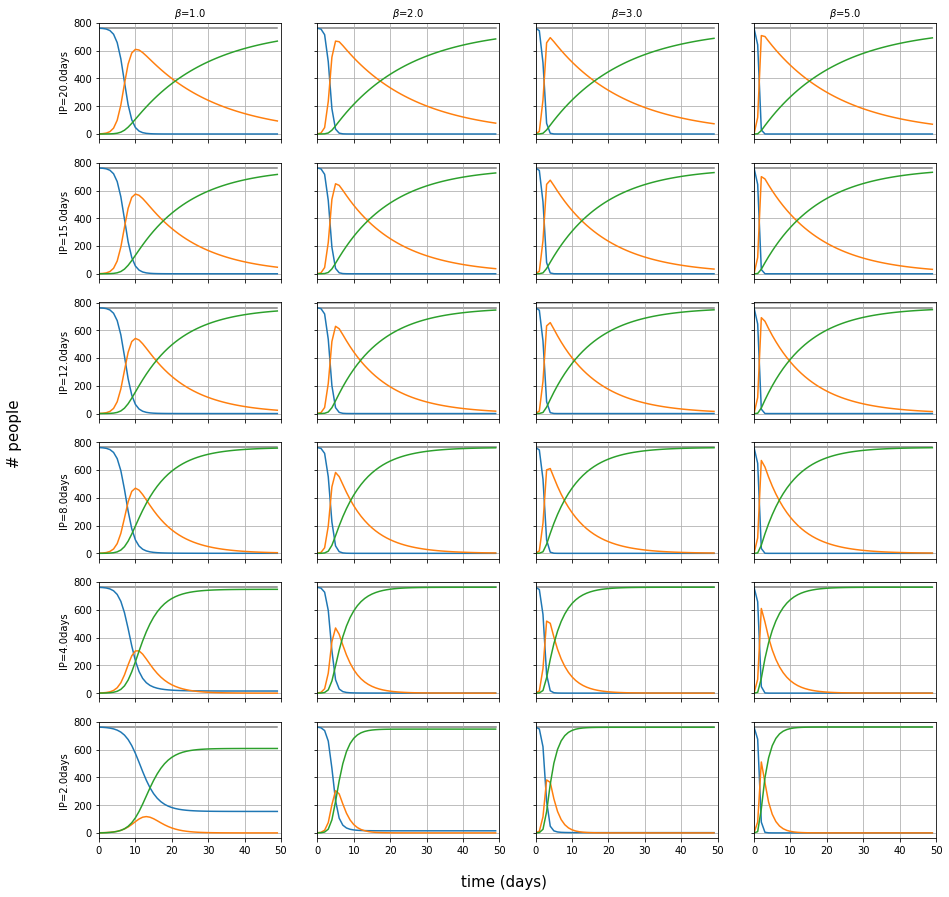

CPU times: user 3.02 s, sys: 42.8 ms, total: 3.06 s
Wall time: 3.11 s


In [7]:
%%time
#--------------------
fig, ax_List = plt.subplots(len(gamma_List), len(beta_List), sharex=True, sharey=True, figsize=[15, 15])
#--------------------
for gg, gamma in enumerate(gamma_List):
    for bb, beta in enumerate(beta_List):
        sol = odeint(func=SIR_RHS_closed, t=t_List, y0=y0, args=(beta, gamma, N), tfirst=True)
        #-----
        ax_List[gg,bb].plot(t_List, sol[:,0], "C0-")
        ax_List[gg,bb].plot(t_List, sol[:,1], "C1-")
        ax_List[gg,bb].plot(t_List, sol[:,2], "C2-")

        ax_List[gg,bb].plot(t_List, [N]*len(t_List), "k-", alpha=0.5, zorder=-1)

        ax_List[gg, bb].set_xlim([t_start, t_stop])

        ax_List[gg,bb].grid(True)
#--------------------
for bb, beta in enumerate(beta_List):
    ax_List[0,bb].set_title(r"$\beta$={}".format(beta_List[bb]), fontsize=10)
#--------------------
for gg, gamma in enumerate(gamma_List):
    #ax_List[gg,0].set_ylabel(r"$\gamma$={}".format(gamma_List[gg]), fontsize=10)
    ax_List[gg,0].set_ylabel("IP={}days".format(IP_List[gg]), fontsize=10)
#--------------------
fig.text(0.5, 0.08, 'time (days)', ha='center', fontsize=15)
fig.text(0.04, 0.5, '# people', va='center', rotation='vertical', fontsize=15)

plt.show()

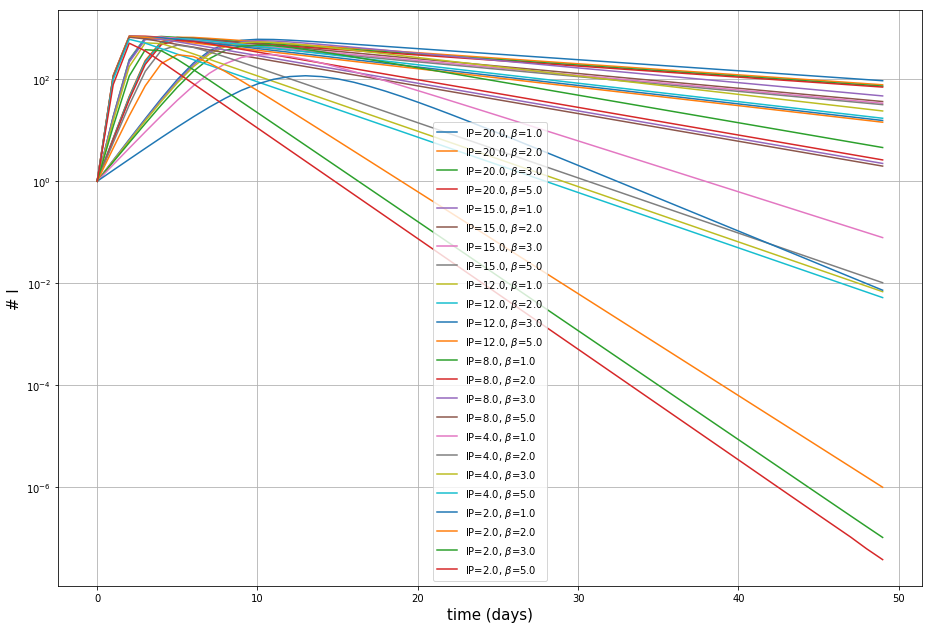

CPU times: user 774 ms, sys: 28.2 ms, total: 802 ms
Wall time: 854 ms


In [8]:
%%time
#--------------------
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
#--------------------
for gg, gamma in enumerate(gamma_List):
    for bb, beta in enumerate(beta_List):
        sol = odeint(func=SIR_RHS_closed, t=t_List, y0=y0, args=(beta, gamma, N), tfirst=True)
        ax.plot(t_List, sol[:,1], label=r"IP={}, $\beta$={}".format(IP_List[gg], beta))
#--------------------
ax.set_yscale("log")
ax.grid(True)
#--------------------
ax.set_xlabel("time (days)", fontsize=15)
ax.set_ylabel("# I", fontsize=15)
# fig.text(0.04, 0.5, '# people', va='center', rotation='vertical', fontsize=15)
#--------------------
plt.legend()
#--------------------
plt.show()